In [86]:
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import warnings
warnings.filterwarnings("ignore")

### Data Importation

In [2]:
col_names = ["duration","protocol_type","service","flag","src_bytes",
             "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
             "logged_in","num_compromised","root_shell","su_attempted","num_root",
             "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
             "is_host_login","is_guest_login","count","srv_count","serror_rate",
             "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
             "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
             "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
             "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
             "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]

In [29]:
kdd_data_set = 'http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data.gz'
kdd_attack_types = 'http://kdd.ics.uci.edu/databases/kddcup99/training_attack_types'
kdd_test_data = 'http://kdd.ics.uci.edu/databases/kddcup99/corrected.gz'

In [30]:
df_kdd_data = pd.read_csv(kdd_data_set, header=None, names = col_names)
df_kdd_test_data = pd.read_csv(kdd_test_data, header=None, names = col_names)

In [31]:
types = requests.get(kdd_attack_types)
attack_dict = {}
types_text_split = types.text.split()
for idx in range(0, len(types_text_split)):
    if idx < len(types_text_split) -1:
        attack_dict[types_text_split[idx]] = types_text_split[idx+1]
attack_dict['normal'] = 'normal'
print(attack_dict)

{'back': 'dos', 'dos': 'warezclient', 'buffer_overflow': 'u2r', 'u2r': 'satan', 'ftp_write': 'r2l', 'r2l': 'warezmaster', 'guess_passwd': 'r2l', 'imap': 'r2l', 'ipsweep': 'probe', 'probe': 'smurf', 'land': 'dos', 'loadmodule': 'u2r', 'multihop': 'r2l', 'neptune': 'dos', 'nmap': 'probe', 'perl': 'u2r', 'phf': 'r2l', 'pod': 'dos', 'portsweep': 'probe', 'rootkit': 'u2r', 'satan': 'probe', 'smurf': 'dos', 'spy': 'r2l', 'teardrop': 'dos', 'warezclient': 'r2l', 'warezmaster': 'r2l', 'normal': 'normal'}


In [32]:
df_kdd_data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,...,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06
mean,4.834243e+01,1.834621e+03,1.093623e+03,5.716116e-06,6.487792e-04,7.961733e-06,1.243766e-02,3.205108e-05,1.435290e-01,8.088304e-03,...,2.329811e+02,1.892142e+02,7.537132e-01,3.071111e-02,6.050520e-01,6.464107e-03,1.780911e-01,1.778859e-01,5.792780e-02,5.765941e-02
std,7.233298e+02,9.414311e+05,6.450123e+05,2.390833e-03,4.285434e-02,7.215084e-03,4.689782e-01,7.299408e-03,3.506116e-01,3.856481e+00,...,6.402094e+01,1.059128e+02,4.111860e-01,1.085432e-01,4.809877e-01,4.125978e-02,3.818382e-01,3.821774e-01,2.309428e-01,2.309777e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,4.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.550000e+02,4.900000e+01,4.100000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,5.200000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.550000e+02,2.550000e+02,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,1.032000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.550000e+02,2.550000e+02,1.000000e+00,4.000000e-02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,5.832900e+04,1.379964e+09,1.309937e+09,1.000000e+00,3.000000e+00,1.400000e+01,7.700000e+01,5.000000e+00,1.000000e+00,7.479000e+03,...,2.550000e+02,2.550000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [33]:
df_kdd_test_data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,311029.000000,3.110290e+05,3.110290e+05,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,...,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000
mean,17.902736,1.731702e+03,7.479937e+02,0.000029,0.000762,0.000051,0.014677,0.002363,0.172476,0.011243,...,235.282681,199.193914,0.793494,0.024953,0.547919,0.004566,0.058764,0.058791,0.142659,0.141693
std,407.644400,1.276567e+05,1.612018e+04,0.005379,0.040367,0.009821,0.312068,0.049990,0.377794,1.958325,...,60.913298,100.306470,0.387090,0.096003,0.491963,0.035773,0.231296,0.232997,0.344380,0.346573
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.050000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,244.000000,0.970000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.010000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,57715.000000,6.282565e+07,5.203179e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We have 4 categorical fields, and 4 binary fields. As a first step, we go around exploring the categorical variables.

In [34]:
df_kdd_data.shape

(4898431, 42)

In [35]:
df_kdd_test_data.shape

(311029, 42)

<h2>Data Exploration and Pre-processing </h2>

In [36]:
# Copy the data frame for repeated evaulation.
df = df_kdd_data.copy(deep=True)
df_test = df_kdd_test_data.copy(deep=True)

In [37]:
# Identifying categorical features
numeric_cols = df._get_numeric_data().columns # gets all the numeric column names
categorical_cols = list(set(df.columns)-set(numeric_cols))
print("Categorical {}".format(categorical_cols))
print("Numerical {}".format(numeric_cols))

Categorical ['flag', 'protocol_type', 'label', 'service']
Numerical Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')


In [38]:
# Converting the Binary Variables in to Categorical. This will help us to better understand the continuous variables.
binary_cols = []
for col in numeric_cols:
    if len(df[col].unique()) <= 2:
        result = []
        s = df[col].value_counts()
        t = float(len(df[col]))
        for v in s.index:
            result.append("{}({}%)".format(v,round(100*(s[v]/t),1)))
        print("{} - [{}]".format(col, " , ".join(result)))
        binary_cols.append(col)
# combine all categorical column names
for col in binary_cols:
    categorical_cols.append(col)

land - [0(100.0%) , 1(0.0%)]
logged_in - [0(85.6%) , 1(14.4%)]
root_shell - [0(100.0%) , 1(0.0%)]
num_outbound_cmds - [0(100.0%)]
is_host_login - [0(100.0%) , 1(0.0%)]
is_guest_login - [0(99.9%) , 1(0.1%)]


In [39]:
print("New Categorical Set {}".format(categorical_cols))

New Categorical Set ['flag', 'protocol_type', 'label', 'service', 'land', 'logged_in', 'root_shell', 'num_outbound_cmds', 'is_host_login', 'is_guest_login']


In [40]:
numeric_features = list(set(numeric_cols)-set(categorical_cols))
print("New Numerical Set {}".format(numeric_cols))

New Numerical Set Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'],
      dtype='object')


<p>EDA For Categorical Data.</p>

In [41]:
df.label.value_counts()

smurf.              2807886
neptune.            1072017
normal.              972781
satan.                15892
ipsweep.              12481
portsweep.            10413
nmap.                  2316
back.                  2203
warezclient.           1020
teardrop.               979
pod.                    264
guess_passwd.            53
buffer_overflow.         30
land.                    21
warezmaster.             20
imap.                    12
rootkit.                 10
loadmodule.               9
ftp_write.                8
multihop.                 7
phf.                      4
perl.                     3
spy.                      2
Name: label, dtype: int64

In [42]:
df.protocol_type.value_counts()

icmp    2833545
tcp     1870598
udp      194288
Name: protocol_type, dtype: int64

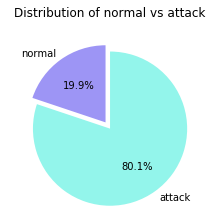

In [43]:
# Pie chart to show normal vs. attacks
colors = ["#9d95f5", "#93f5eb"]
labels = ['normal', 'attack']
sizes = [972781, 4898431-972781]
explode = (0.05, 0.05)  
plt.pie(sizes, explode =explode ,labels=labels, autopct='%1.1f%%', colors=colors, shadow=False, startangle=90)
plt.axis('equal')
plt.title('Distribution of normal vs attack\n')
plt.tight_layout()
fig = plt.gcf()
fig.set_size_inches(3,3)
plt.show()

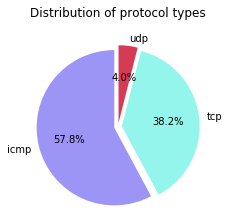

In [44]:
# Pie chart to classify protocols of connections
colors = ["#9d95f5", "#93f5eb", "#D63B55"]
labels = ['icmp', 'tcp', 'udp']
sizes = [2833545, 1870598, 194288]
explode = (0.05, 0.05, 0.05)  
plt.pie(sizes, explode =explode ,labels=labels, autopct='%1.1f%%', colors=colors, shadow=False, startangle=90)
plt.axis('equal')
plt.title('Distribution of protocol types\n')
plt.tight_layout()
fig = plt.gcf()
fig.set_size_inches(3,3)
plt.show()

In [45]:
def binary_classifier(train_data):
#   Converting the labels as 0 (Normal) and 1 as (Attack)
    train_data['label'][train_data['label']!='normal.'] = 'attack'  # end with .
    train_data['label'][train_data['label']=='normal.'] = 0
    train_data['label'][train_data['label']=='attack'] = 1
    train_data[['label']] = train_data[['label']].apply(pd.to_numeric)
    return train_data

<p>The dependency variable or label feature has multiple attacks, for this project we will explore around the binary classification.</p>
<p>In this analysis, we only identify if a attack can be identified based on the input features</p>
<p>We represet attacks as 1 and normal as 0</p>

In [46]:
df = binary_classifier(df)
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,0
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,0
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,0
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0


In [47]:
df_test = binary_classifier(df_test)
df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0
1,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0
2,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,0
3,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,1
4,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,1


In [48]:
df.loc[df["protocol_type"]=="icmp"].label.value_counts()

1    2820782
0      12763
Name: label, dtype: int64

In [49]:
df.loc[df["protocol_type"]=="tcp"].label.value_counts()

1    1101928
0     768670
Name: label, dtype: int64

In [50]:
df.loc[df["protocol_type"]=="udp"].label.value_counts()

0    191348
1      2940
Name: label, dtype: int64

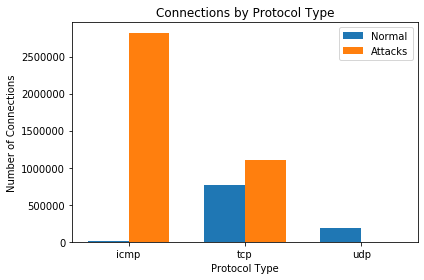

In [51]:
# a graph for protocol type and the label
labels = ['icmp', 'tcp', 'udp']
protocol_normal = [12763, 768670, 191348]
protocol_attack = [2820782, 1101928, 2940]
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, protocol_normal, width, label='Normal')
rects2 = ax.bar(x + width/2, protocol_attack, width, label='Attacks')
ax.set_xlabel('Protocol Type')
ax.set_ylabel('Number of Connections')
ax.set_title('Connections by Protocol Type')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
fig.tight_layout()
plt.show()

<p>The above analysis yields that, columns num_outbound_cmds has only one value. On the other hand, columns service and flag 
high cardenality ratio.  high cardenality might end up with feature too sparse, better remove those features.</p>
<p>We choose to remove 'flag', 'service', 'num_outbound_cmds'</p>
<p>and keep the 'protocol_type', 'label'. 'label' will be replaced with 0 (normal), 1 (has attack) for binary classifier</p>

In [52]:
# df.drop('service',axis = 1,inplace = True)
df.drop('flag',axis = 1,inplace = True)
df.drop('service',axis = 1,inplace = True)
df.drop('num_outbound_cmds',axis = 1,inplace = True)

df_test.drop('flag',axis = 1,inplace = True)
df_test.drop('service',axis = 1,inplace = True)
df_test.drop('num_outbound_cmds',axis = 1,inplace = True)

In [53]:
# Converting Categorical values to numeric
# protocol_type feature mapping
pmap = {'icmp':0,'tcp':1,'udp':2}
df['protocol_type'] = df['protocol_type'].map(pmap)
df_test['protocol_type'] = df_test['protocol_type'].map(pmap)

In [54]:
df.head()

,duration,protocol_type,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,1,215,45076,0,0,0,0,0,1,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0
1,0,1,162,4528,0,0,0,0,0,1,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,0
2,0,1,236,1228,0,0,0,0,0,1,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,0
3,0,1,233,2032,0,0,0,0,0,1,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,0
4,0,1,239,486,0,0,0,0,0,1,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0


# Continuos variable analysis

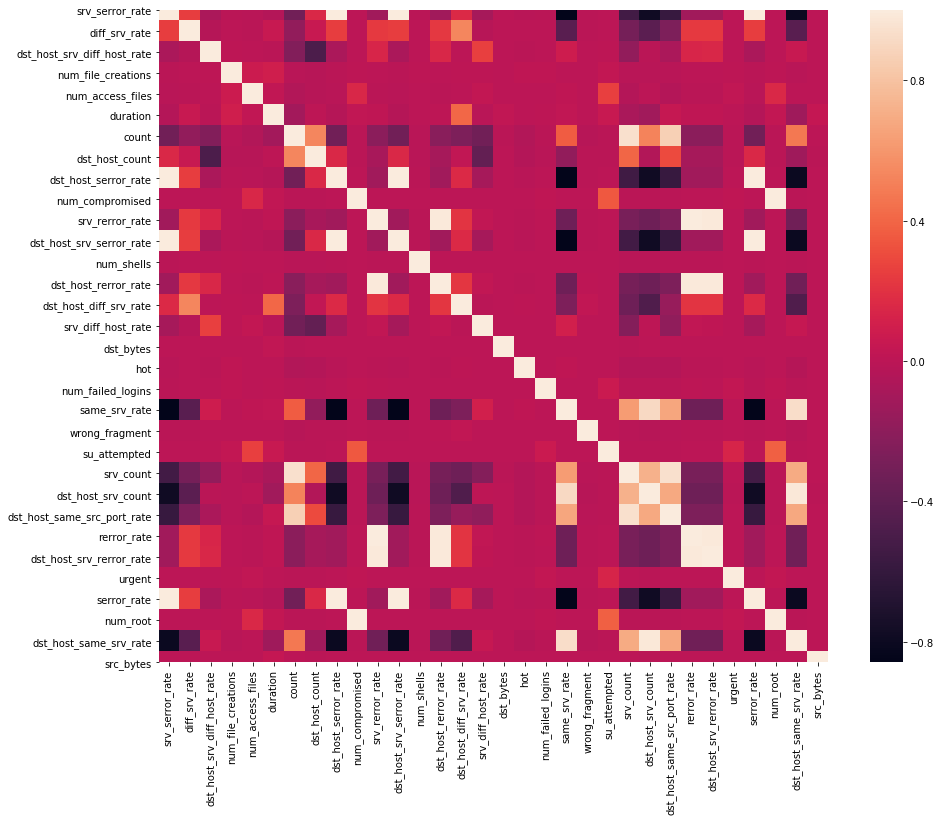

In [55]:
corr = df[numeric_features].corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr)
plt.show()

In [56]:
print("num_root vs num_compromised {}".format(df['num_root'].corr(df['num_compromised'])))
print("srv_serror_rate vs serror_rate{}".format(df['srv_serror_rate'].corr(df['serror_rate'])))
print("srv_count vs count {}".format(df['srv_count'].corr(df['count'])))
print("srv_rerror_rate vs rerror_rate {}".format(df['srv_rerror_rate'].corr(df['rerror_rate'])))
print("dst_host_same_srv_rate vs {} dst_host_srv_count".format(df['dst_host_same_srv_rate'].corr(df['dst_host_srv_count'])))
print("dst_host_srv_serror_rate{} vs dst_host_serror_rate".format(df['dst_host_srv_serror_rate'].corr(df['dst_host_serror_rate'])))
print("dst_host_srv_rerror_rate vs dst_host_rerror_rate{}".format(df['dst_host_srv_rerror_rate'].corr(df['dst_host_rerror_rate'])))
print("dst_host_same_srv_rate vs same_srv_rate{}".format(df['dst_host_same_srv_rate'].corr(df['same_srv_rate'])))
print("dst_host_srv_count vs same_srv_rate{}".format(df['dst_host_srv_count'].corr(df['same_srv_rate'])))
print("dst_host_same_src_port_rate vs srv_count{}".format(df['dst_host_same_src_port_rate'].corr(df['srv_count'])))
print("dst_host_serror_rate vs serror_rate {}".format(df['dst_host_serror_rate'].corr(df['serror_rate'])))
print("dst_host_serror_rate vs srv_serror_rate {}".format(df['dst_host_serror_rate'].corr(df['srv_serror_rate'])))
print("dst_host_srv_serror_rate vs serror_rate {}".format(df['dst_host_srv_serror_rate'].corr(df['serror_rate'])))
print("dst_host_srv_serror_rate vs {}".format(df['dst_host_srv_serror_rate'].corr(df['srv_serror_rate'])))
print("dst_host_rerror_rate vs rerror_rate {}".format(df['dst_host_rerror_rate'].corr(df['rerror_rate'])))
print("dst_host_rerror_rate vs srv_rerror_rate {}".format(df['dst_host_rerror_rate'].corr(df['srv_rerror_rate'])))
print("dst_host_srv_rerror_rate vs rerror_rate{}".format(df['dst_host_srv_rerror_rate'].corr(df['rerror_rate'])))
print("dst_host_srv_rerror_rate vs srv_rerror_rate {}".format(df['dst_host_srv_rerror_rate'].corr(df['srv_rerror_rate'])))

num_root vs num_compromised 0.9975798933487737
srv_serror_rate vs serror_rate0.9986924138664222
srv_count vs count 0.9433902218808042
srv_rerror_rate vs rerror_rate 0.9953719458068703
dst_host_same_srv_rate vs 0.9788464524225914 dst_host_srv_count
dst_host_srv_serror_rate0.998285955975919 vs dst_host_serror_rate
dst_host_srv_rerror_rate vs dst_host_rerror_rate0.9869790678086942
dst_host_same_srv_rate vs same_srv_rate0.9316213679073936
dst_host_srv_count vs same_srv_rate0.9075289446662882
dst_host_same_src_port_rate vs srv_count0.9473596471554561
dst_host_serror_rate vs serror_rate 0.9990059376728406
dst_host_serror_rate vs srv_serror_rate 0.9979417182527545
dst_host_srv_serror_rate vs serror_rate 0.9982509415923287
dst_host_srv_serror_rate vs 0.9993917300385466
dst_host_rerror_rate vs rerror_rate 0.9897555886509829
dst_host_rerror_rate vs srv_rerror_rate 0.9855530624565976
dst_host_srv_rerror_rate vs rerror_rate0.9859781723139902
dst_host_srv_rerror_rate vs srv_rerror_rate 0.9879088754

In [57]:
# Based on the correlation, computation we will drop columns that are highly coorelated.
df.drop('num_root',axis = 1,inplace = True)
df.drop('srv_serror_rate',axis = 1,inplace = True)
df.drop('srv_rerror_rate',axis = 1, inplace=True)
df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)
df.drop('dst_host_serror_rate',axis = 1, inplace=True)
df.drop('dst_host_rerror_rate',axis = 1, inplace=True)
df.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)
df.drop('dst_host_same_srv_rate',axis = 1, inplace=True)

In [58]:
# Based on the correlation, computation we will drop columns that are highly coorelated.
df_test.drop('num_root',axis = 1,inplace = True)
df_test.drop('srv_serror_rate',axis = 1,inplace = True)
df_test.drop('srv_rerror_rate',axis = 1, inplace=True)
df_test.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)
df_test.drop('dst_host_serror_rate',axis = 1, inplace=True)
df_test.drop('dst_host_rerror_rate',axis = 1, inplace=True)
df_test.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)
df_test.drop('dst_host_same_srv_rate',axis = 1, inplace=True)

In [59]:
# def multiclass_classifier(train_data):
#     print("Multiclass Classifier")
#     types = requests.get(kdd_attack_types)
#     attack_dict = {}
#     types_text_split = types.text.split()
#     for idx in range(0, len(types_text_split)):
#         if idx < len(types_text_split) -1:
#             attack_dict[types_text_split[idx]] = types_text_split[idx+1]
#     attack_dict['normal'] = 'normal'
#     #   Some label values have . at the end, so just copying everything, except the last character
#     train_data['label'] = train_data.label.apply(lambda x : attack_dict[x[0:-1]] )
#     return train_data

# Model Execution

In [98]:
# Array for storing classifier and scores
#https://stackoverflow.com/questions/50666091/true-positive-rate-and-false-positive-rate-tpr-fpr-for-multi-class-data-in-py/50671617
def generate_result_metrics(name, y_true, y_prediction):
    cnf_matrix = confusion_matrix(y_true, y_prediction)
#     print("Confusion Matrix for {} Classifier\n{}\n".format(name, cnf_matrix))
    sns.heatmap(cnf_matrix/np.sum(cnf_matrix), annot=True, fmt='.2%', cmap='Blues')
    #[[1 1 3]
    # [3 2 2]
    # [1 3 1]]
#     print(cnf_matrix)
    FP = cnf_matrix[0][0]  
    FN = cnf_matrix[1][0]
    TP = cnf_matrix[1][1]
    TN = cnf_matrix[0][0]

    FP = FP.astype(float)
    FN = FN.astype(float)
    TP = TP.astype(float)
    TN = TN.astype(float)

    result = {}
    result['Algorithm'] = name
    
    # Overall accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN)
    result['ACC'] = ACC
    print("The Overall accuracy {} is {}".format(name, ACC))
    
    # Precision or positive predictive value
    PPV = TP/(TP+FP)
    result['PPV'] = PPV
    print("The Precision or positive predictive value (precision) for {} is {}".format(name, PPV))
    
    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    result['TPR'] = TPR
    print("The True Positive Rate (recall) for {} is {}".format(name, TPR))
    
    # f1-score
    result['Algorithm'] = name
    F1 = 2*PPV*TPR/(PPV+TPR)
    result['F1'] = F1
    print("The F1-score for {} is {}".format(name, F1))
    
    # Specificity or true negative rate
    TNR = TN/(TN+FP) 
    result['TNR'] = TNR
    print("The True Negative Rate for {} is {}".format(name, TNR))

    # Negative predictive value
    NPV = TN/(TN+FN)
    result['NPV'] = NPV
    print("The Negative predictive value for {} is {}".format(name, NPV))

    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    result['FPR'] = FPR
    print("The Fall out or false positive rate {} is {}".format(name, FPR))

    # False negative rate
    FNR = FN/(TP+FN)
    result['FNR'] = FNR
    print("The False negative rate {} is {}".format(name, FNR))

    # False discovery rate
    FDR = FP/(TP+FP)
    result['FDR'] = FDR
    print("The False discovery rate {} is {}".format(name, FDR))
    
    return result

In [104]:
def decision_trees(train_feature, train_label, test_feature, test_label):
    clf = tree.DecisionTreeClassifier(splitter = "random", criterion = "entropy", max_depth=15)
    clf.fit(train_feature, train_label.values.ravel())
    prediction = clf.predict(test_feature)
    print("Feature Importance {}".format(clf.feature_importances_))
    return prediction


In [103]:
def logistic_classifier(train_feature, train_label, test_feature, test_label):
    clf = LogisticRegression(max_iter=90)
    clf.fit(train_feature, train_label.values.ravel())
    prediction = clf.predict(test_feature)
    return prediction


In [107]:
def random_forest_classifier(train_feature, train_label, test_feature, test_label):
    clf = RandomForestClassifier(n_estimators=30)
    clf.fit(train_feature, train_label.values.ravel())
    prediction = clf.predict(test_feature)
    print("Feature Importance {}".format(clf.feature_importances_))
    return prediction


In [114]:
def gaussian_naive_bayes_classifier(train_feature, train_label, test_feature, test_label):
    clf = GaussianNB()
    clf.fit(train_feature, train_label.values.ravel())
    prediction = clf.predict(test_feature)
    return prediction


# Binary Classifier

In [99]:
Y_train = df['label'] # train label
Y_test = df_test['label'] # test label
X_train = df.drop(['label'], axis=1) # train feature
X_test =  df_test.drop(['label'], axis=1) # test feature
result_metric = []

<p>Decision Tree</p>

Feature Importance [6.95059440e-05 2.51474498e-01 4.13779060e-03 1.10690056e-04
 1.21184097e-06 1.86522790e-03 2.62207064e-06 9.92295842e-04
 9.50120708e-05 5.77900737e-01 4.08307536e-03 1.12310434e-05
 2.78515111e-07 8.83835512e-06 9.60690809e-06 8.25348505e-06
 0.00000000e+00 3.71045822e-04 2.76064261e-02 1.73605577e-04
 7.27165040e-03 5.62251786e-03 8.10835794e-05 8.98171917e-04
 8.89608120e-04 1.09403985e-01 2.63403573e-03 2.10539972e-03
 9.54717913e-04 1.21687757e-03]
The Overall accuracy Decision Tree is 0.7747500067383628
The Precision or positive predictive value (precision) for Decision Tree is 0.7902623156136933
The True Positive Rate (recall) for Decision Tree is 0.9070301394368222
The F1-score for Decision Tree is 0.8446296172351991
The True Negative Rate for Decision Tree is 0.5
The Negative predictive value for Decision Tree is 0.7213952375254278
The Fall out or false positive rate Decision Tree is 0.5
The False negative rate Decision Tree is 0.09296986056317781
The False

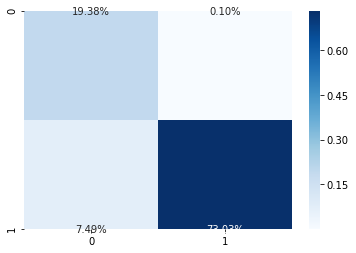

In [100]:
prediction = decision_trees(X_train, Y_train, X_test, Y_test)
result = generate_result_metrics("Decision Tree", Y_test, prediction)
result_metric.append(result)  

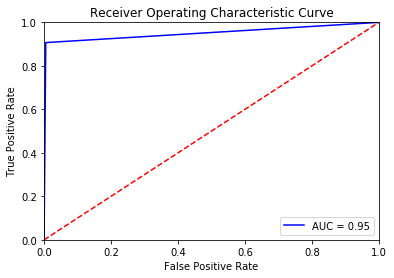

In [101]:
# Show ROC curve
fpr, tpr, threshold = metrics.roc_curve(Y_test, prediction)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Logistic Regression

The Overall accuracy Logistic Regression is 0.727931036362348
The Precision or positive predictive value (precision) for Logistic Regression is 0.7819432328307581
The True Positive Rate (recall) for Logistic Regression is 0.833945598875561
The F1-score for Logistic Regression is 0.8071076484898373
The True Negative Rate for Logistic Regression is 0.5
The Negative predictive value for Logistic Regression is 0.5834193154156692
The Fall out or false positive rate Logistic Regression is 0.5
The False negative rate Logistic Regression is 0.16605440112443898
The False discovery rate Logistic Regression is 0.21805676716924194


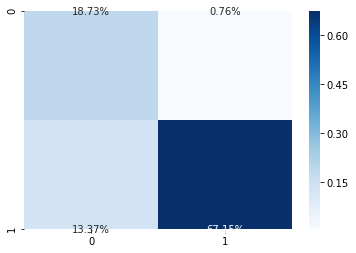

In [105]:
prediction = logistic_classifier(X_train, Y_train, X_test, Y_test)
result = generate_result_metrics("Logistic Regression", Y_test, prediction)
result_metric.append(result)  

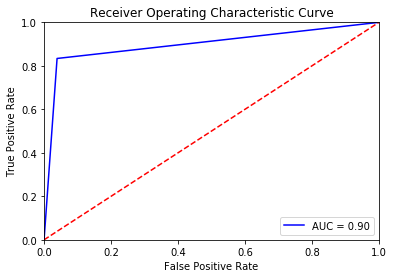

In [106]:
# Show ROC curve
fpr, tpr, threshold = metrics.roc_curve(Y_test, prediction)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Random Forest

Feature Importance [3.56105141e-03 4.25531537e-02 6.81588285e-02 1.09499553e-01
 3.78108451e-06 5.01276502e-04 1.78515936e-06 6.63283972e-04
 2.85096931e-05 1.36210319e-01 7.34891785e-04 5.35111519e-06
 1.84104807e-06 7.89173631e-05 4.37305581e-06 1.23305236e-04
 3.61032963e-08 6.96850204e-05 2.31469099e-01 4.03245904e-02
 1.82635057e-02 3.75468597e-03 5.05592062e-02 4.43304738e-02
 1.13507843e-02 7.96210230e-02 3.04600198e-02 2.07726376e-02
 8.74403648e-02 1.94536671e-02]
The Overall accuracy Random Forest is 0.7738853674837763
The Precision or positive predictive value (precision) for Random Forest is 0.7899645146799182
The True Positive Rate (recall) for Random Forest is 0.9058082703764635
The F1-score for Random Forest is 0.843929560618828
The True Negative Rate for Random Forest is 0.5
The Negative predictive value for Random Forest is 0.7188539146395242
The Fall out or false positive rate Random Forest is 0.5
The False negative rate Random Forest is 0.09419172962353656
The False 

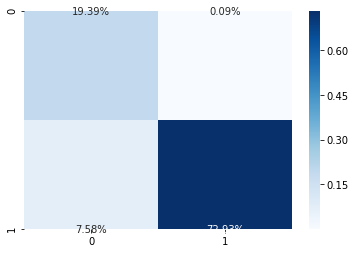

In [109]:
prediction = random_forest_classifier(X_train, Y_train, X_test, Y_test)
result = generate_result_metrics("Random Forest", Y_test, prediction)
result_metric.append(result)  

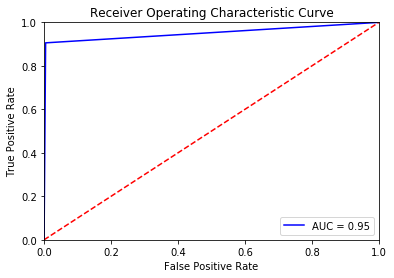

In [110]:
# Show ROC curve
fpr, tpr, threshold = metrics.roc_curve(Y_test, prediction)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Naive Bayes

The Overall accuracy Naive Bayes is 0.7079403538441524
The Precision or positive predictive value (precision) for Naive Bayes is 0.7730970510656054
The True Positive Rate (recall) for Naive Bayes is 0.8063656982223003
The F1-score for Naive Bayes is 0.7893810014287138
The True Negative Rate for Naive Bayes is 0.5
The Negative predictive value for Naive Bayes is 0.5500032478680067
The Fall out or false positive rate Naive Bayes is 0.5
The False negative rate Naive Bayes is 0.1936343017776997
The False discovery rate Naive Bayes is 0.22690294893439453


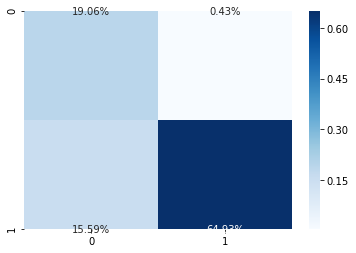

In [115]:
prediction = gaussian_naive_bayes_classifier(X_train, Y_train, X_test, Y_test)
result = generate_result_metrics("Naive Bayes", Y_test, prediction)
result_metric.append(result) 

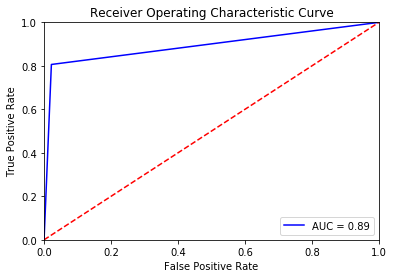

In [116]:
# Show ROC curve
fpr, tpr, threshold = metrics.roc_curve(Y_test, prediction)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

SVM
<p>we use 4 differnent SVM classfiers: SVC with linear kernel function, SVC with rbf (Radial basis function kernel) kernel, SVC with polynomial (degree 3) kernel, LinearSVC (linear kernel); It takes a long time to train. Results show that SVM with LinearSVC (linear kernel) has the best performance.</p>

The Overall accuracy SVM is 0.8292579254973729
The Precision or positive predictive value (precision) for SVM is 0.8427684597203634
The True Positive Rate (recall) for SVM is 0.9454072098260633
The F1-score for SVM is 0.8911421753498492
The True Negative Rate for SVM is 0.5
The Negative predictive value for SVM is 0.7636401355369615
The Fall out or false positive rate SVM is 0.5
The False negative rate SVM is 0.05459279017393665
The False discovery rate SVM is 0.15723154027963665


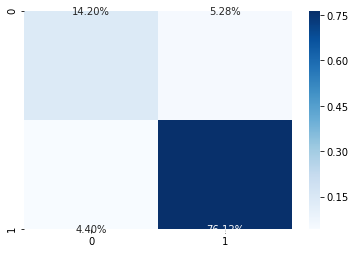

In [118]:
from sklearn import svm
C = 1.0  # SVM regularization parameter
lin_svc = svm.LinearSVC(C=C).fit(X_train, Y_train)
prediction = lin_svc.predict(X_test);
result = generate_result_metrics("SVM", Y_test, prediction)
result_metric.append(result) 

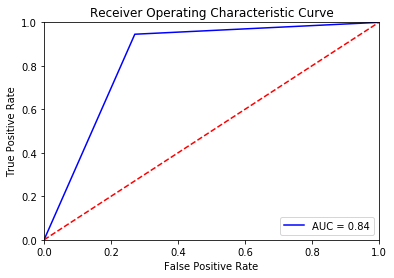

In [119]:
# Show ROC curve
fpr, tpr, threshold = metrics.roc_curve(Y_test, prediction)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

K-Nearest Neighbour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X_train, Y_train)
prediction = clf.predict(X_test)
result = generate_result_metrics("K-nn", Y_test, prediction)
result_metric.append(result) 

In [ ]:
# Show ROC curve
fpr, tpr, threshold = metrics.roc_curve(Y_test, prediction)
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
pd.DataFrame(result_metric)

In [120]:
result_metric

[{'Algorithm': 'Decision Tree',
  'ACC': 0.7747500067383628,
  'PPV': 0.7902623156136933,
  'TPR': 0.9070301394368222,
  'F1': 0.8446296172351991,
  'TNR': 0.5,
  'NPV': 0.7213952375254278,
  'FPR': 0.5,
  'FNR': 0.09296986056317781,
  'FDR': 0.20973768438630672},
 {'Algorithm': 'Logistic Regression',
  'ACC': 0.727931036362348,
  'PPV': 0.7819432328307581,
  'TPR': 0.833945598875561,
  'F1': 0.8071076484898373,
  'TNR': 0.5,
  'NPV': 0.5834193154156692,
  'FPR': 0.5,
  'FNR': 0.16605440112443898,
  'FDR': 0.21805676716924194},
 {'Algorithm': 'Random Forest',
  'ACC': 0.7738853674837763,
  'PPV': 0.7899645146799182,
  'TPR': 0.9058082703764635,
  'F1': 0.843929560618828,
  'TNR': 0.5,
  'NPV': 0.7188539146395242,
  'FPR': 0.5,
  'FNR': 0.09419172962353656,
  'FDR': 0.21003548532008176},
 {'Algorithm': 'Naive Bayes',
  'ACC': 0.7079403538441524,
  'PPV': 0.7730970510656054,
  'TPR': 0.8063656982223003,
  'F1': 0.7893810014287138,
  'TNR': 0.5,
  'NPV': 0.5500032478680067,
  'FPR': 0.5,
